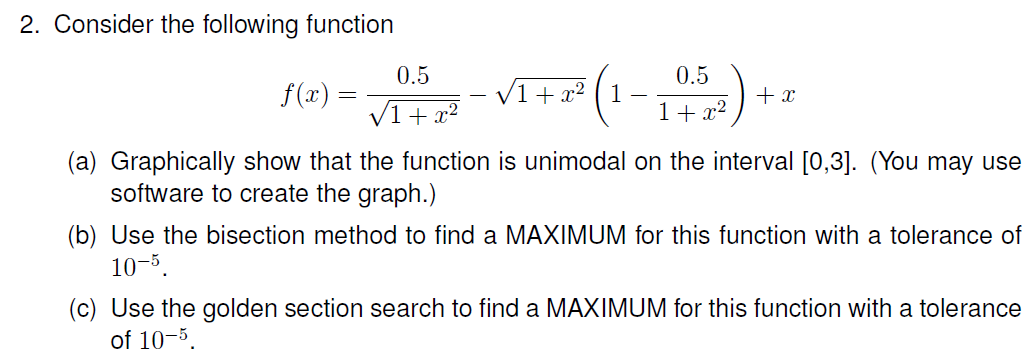

### (a): Graphically show that the function is unimodal on the interval [0,3]. (You may use software to create the graph.)

In [1]:
import numpy as np
import pandas as pd
import sympy as sympy
import math

In [2]:
#generate a list of x values with end points 0 and 3
start = 0
stop = 3
x_values = np.linspace(start, stop, num = 50, endpoint = True, retstep = False,   dtype = float)

x_list, f_x = [], [] #create lists to store data
for value in x_values:
    temp = (0.5/np.sqrt(1+value**2))-(np.sqrt(1+value**2)*(1-(0.5/(1+value**2))))+value
    x_list.append(value)
    f_x.append(temp)

fx_max_value = max(f_x) #Return the max value of the list.
fx_max_index = f_x. index(fx_max_value) #return index of max value
x_at_max_value = x_list[fx_max_index] #get x value corresponding to fx_max

In [3]:
fx_max_value, x_at_max_value

(0.3002635410437066, 0.7959183673469388)

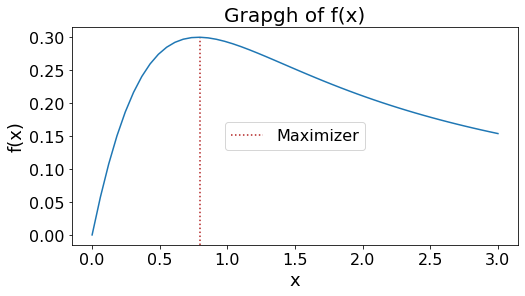

In [4]:
# importing the required module
import matplotlib.pyplot as plt
 
plt.figure(figsize=(8, 4))
plt.plot(x_list, f_x)
plt.axvline(x = x_at_max_value, ymin = min(f_x), ymax=0.95, linestyle = ":", color="firebrick", label="Maximizer")
plt.xlabel('x', fontsize = 18)
plt.ylabel('f(x)', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc="center", fontsize = 16)
plt.title('Grapgh of f(x)', fontsize = 20)
plt.show()

A function is unimodal on an interval if it has a single minimizer or single maximizer on that interval, and not both. The displayed graph has only one maximizer

### Golden section search method

__(c)__ Use the golden section search to find a MAXIMUM for this function with a tolerance of 0.00001.

__Note:__ The Golden section search method is a minimization method. Thus, to use it for maximization, we need to negative the ojectiove function.

In [5]:
def golden_section_search_method(fx,a,b,Threshold):
    """
    proximate solution of f(x)=0 on interval [a,b] by bisection method.

    Parameters
    ----------
    fx : Function 
        The function to be maximized
    a,b : Numbers
        The interval to search for a solution. 
    Threshold: float
        The threshold of approximation error to terminate iteration
    @eturns
    -------
    df:
       pandas dataframe of a,b, midpoint values, function evalauted at each iteration, slope of function at each iteration
    """
    
    #create list to store data
    a_list, b_list, diff_list, x1_list, x2_list, fx_x1_list, fx_x2_list= [],[],[],[],[],[],[]
    neg_fx_x2_list = []
    
    #Golden ration
    gamma = (-1+ math.sqrt(5))/2
    #calculate difference
    diff = b-a
    
    #if the difference is smaller or equal to threshold, return
    if diff <= Threshold:
        if fx(a) < fx(b):
            return a #minimizer
        else:
            return b #as minimizer
    
    #find optimal point by iteration
    while diff >Threshold:
        x1 = b - gamma*(b-a)
        x2 = a + gamma*(b-a)        
        fx_x1 = fx(x1) #evaluate differential at lower limit
        fx_x2 = fx(x2) #evaluate differential at upper limit
        neg_fx_x2 = -fx(x2) #evaluate differential at upperit
        
        a_list.append(a), b_list.append(b), diff_list.append(diff)
        
        x1_list.append(x1), x2_list.append(x2), fx_x1_list.append(fx_x1), fx_x2_list.append(fx_x2)
        neg_fx_x2_list.append(neg_fx_x2)

        if fx_x1 < fx_x2:
            b = x2
        else:
            a = x1
            #if the difference is smaller or equal to threshold, return
        if diff <= Threshold:
            if fx(a) < fx(b):
                return a #minimizer
            else:
                return b #as minimizer
        
        diff = b-a
    #save data in a pandas dataframe
    df = pd.DataFrame(zip(a_list, b_list, diff_list, x1_list, x2_list, fx_x1_list, fx_x2_list, neg_fx_x2_list),
                     columns = ["a", "b", "b-a", "x1", "x2", "f(x1)", "f(x2)","-f(x2)"])
    return df

In [6]:
#function to maximize (negative of the function)
fx = lambda x: (-0.5*((1 + x**2)**-0.5))+(((1+ x**2)**0.5)*(1-(0.5*(1 + x**2)**-1))) -x
x_optimal = golden_section_search_method(fx,0,3,0.00001)
x_optimal

,a,b,b-a,x1,x2,f(x1),f(x2),-f(x2)
0,0.000000,3.000000,3.000000,1.145898,1.854102,-0.282529,-0.222221,0.222221
1,0.000000,1.854102,1.854102,0.708204,1.145898,-0.298900,-0.282529,0.282529
2,0.000000,1.145898,1.145898,0.437694,0.708204,-0.262193,-0.298900,0.298900
3,0.437694,1.145898,0.708204,0.708204,0.875388,-0.298900,-0.298796,0.298796
4,0.437694,0.875388,0.437694,0.604878,0.708204,-0.291816,-0.298900,0.298900
5,0.604878,0.875388,0.270510,0.708204,0.772063,-0.298900,-0.300241,0.300241
6,0.708204,0.875388,0.167184,0.772063,0.811529,-0.300241,-0.300153,0.300153
7,0.708204,0.811529,0.103326,0.747671,0.772063,-0.299961,-0.300241,0.300241
8,0.747671,0.811529,0.063859,0.772063,0.787138,-0.300241,-0.300283,0.300283
9,0.772063,0.811529,0.039467,0.787138,0.796454,-0.300283,-0.300261,0.300261


In [7]:
#class example
fx = lambda x: x**5 - 5*x**3 - 20*x + 5
x_optimal = golden_section_search_method(fx,0,3,0.00001)
x_optimal

,a,b,b-a,x1,x2,f(x1),f(x2),-f(x2)
0,0.000000,3.000000,3.000000,1.145898,1.854102,-23.465512,-42.039920,42.039920
1,1.145898,3.000000,1.854102,1.854102,2.291796,-42.039920,-37.798567,37.798567
2,1.145898,2.291796,1.145898,1.583592,1.854102,-36.569198,-42.039920,42.039920
3,1.583592,2.291796,0.708204,1.854102,2.021286,-42.039920,-42.977005,42.977005
4,1.854102,2.291796,0.437694,2.021286,2.124612,-42.977005,-42.153429,42.153429
5,1.854102,2.124612,0.270510,1.957428,2.021286,-42.912047,-42.977005,42.977005
6,1.957428,2.124612,0.167184,2.021286,2.060753,-42.977005,-42.807468,42.807468
7,1.957428,2.060753,0.103326,1.996894,2.021286,-42.999519,-42.977005,42.977005
8,1.957428,2.021286,0.063859,1.981819,1.996894,-42.983682,-42.999519,42.999519
9,1.981819,2.021286,0.039467,1.996894,2.006211,-42.999519,-42.998063,42.998063
